# Exploratory Data Analysis (EDA)
## Análisis de Sentimientos – YouTube (Nintendo Switch 2)

Los datos provienen de comentarios reales de YouTube relacionados con el lanzamiento de la Nintendo Switch 2.


Importación de librerías

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime


sns.set(style="whitegrid")


Verificación del dataset a utilizar

In [31]:
ruta_raw = "../../data/raw/youtube_comments_raw.csv"

df = pd.read_csv(ruta_raw)

print(f"Total de registros cargados: {df.shape[0]}")
df.head()


Total de registros cargados: 14061


,video_id,comment_id,text,emojis,author,likes,published_at,is_reply,raw,parent_id
0,9flte56erE8,UgySB0dkRPOL4UmHDdN4AaABAg,Bro the released date is 2 June not 5,[],@FirashMarzelan,0,2025-12-12T06:36:34Z,False,"{'channelId': 'UCGIY_O-8vW4rfX98KlMkvRg', 'vid...",NaN
1,9flte56erE8,UgzprNz-M-yQmHCAoXx4AaABAg,Awesome,[],@HappyAlamina,0,2025-12-12T00:21:15Z,False,"{'channelId': 'UCGIY_O-8vW4rfX98KlMkvRg', 'vid...",NaN
2,9flte56erE8,Ugxa8lfkjfdfl1vNMOV4AaABAg,we have lot of money so new pc console,[],@kj-b8z,0,2025-12-07T01:53:15Z,False,"{'channelId': 'UCGIY_O-8vW4rfX98KlMkvRg', 'vid...",NaN
3,9flte56erE8,UgzIydODhfoZBZOLLJd4AaABAg,"I brought it for ฿15,000\n😢",['😢'],@Buderman14,0,2025-12-06T00:04:27Z,False,"{'channelId': 'UCGIY_O-8vW4rfX98KlMkvRg', 'vid...",NaN
4,9flte56erE8,UgwPjwxGcoea80VIeY54AaABAg,I have it😂,['😂'],@BraydeHodson,1,2025-12-01T06:32:28Z,False,"{'channelId': 'UCGIY_O-8vW4rfX98KlMkvRg', 'vid...",NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14061 entries, 0 to 14060
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      14061 non-null  object
 1   comment_id    14061 non-null  object
 2   text          14060 non-null  object
 3   emojis        14061 non-null  object
 4   author        14051 non-null  object
 5   likes         14061 non-null  int64 
 6   published_at  14061 non-null  object
 7   is_reply      14061 non-null  bool  
 8   raw           14061 non-null  object
 9   parent_id     2770 non-null   object
dtypes: bool(1), int64(1), object(8)
memory usage: 1002.5+ KB


In [33]:
df.describe(include="all")

,video_id,comment_id,text,emojis,author,likes,published_at,is_reply,raw,parent_id
count,14061,14061,14060,14061,14051,14061.000000,14061,14061,14061,2770
unique,1,14061,13567,622,11538,NaN,13030,2,14060,1336
top,9flte56erE8,UgySB0dkRPOL4UmHDdN4AaABAg,Drop the price,[],@cellversesfrieza,NaN,2025-04-02T14:06:56Z,False,"{'channelId': 'UCGIY_O-8vW4rfX98KlMkvRg', 'vid...",UgxiNrkGyjji9JYgBvx4AaABAg
freq,14061,1,59,12168,105,NaN,8,11291,2,5
mean,NaN,NaN,NaN,NaN,NaN,15.249271,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,358.583308,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [34]:
columnas_utiles = [
    "video_id",
    "comment_id",
    "text",
    "author",
    "likes",
    "published_at",
    "is_reply"
]

df = df[columnas_utiles]
df.head()


,video_id,comment_id,text,author,likes,published_at,is_reply
0,9flte56erE8,UgySB0dkRPOL4UmHDdN4AaABAg,Bro the released date is 2 June not 5,@FirashMarzelan,0,2025-12-12T06:36:34Z,False
1,9flte56erE8,UgzprNz-M-yQmHCAoXx4AaABAg,Awesome,@HappyAlamina,0,2025-12-12T00:21:15Z,False
2,9flte56erE8,Ugxa8lfkjfdfl1vNMOV4AaABAg,we have lot of money so new pc console,@kj-b8z,0,2025-12-07T01:53:15Z,False
3,9flte56erE8,UgzIydODhfoZBZOLLJd4AaABAg,"I brought it for ฿15,000\n😢",@Buderman14,0,2025-12-06T00:04:27Z,False
4,9flte56erE8,UgwPjwxGcoea80VIeY54AaABAg,I have it😂,@BraydeHodson,1,2025-12-01T06:32:28Z,False


Limpieza de textos

In [35]:
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower()
    texto = re.sub(r"http\S+", "", texto)   # quitar URLs
    texto = re.sub(r"[^a-zA-Z0-9\s]", "", texto)  # quitar símbolos
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

df["text_clean"] = df["text"].apply(limpiar_texto)
df[["text", "text_clean"]].head()


,text,text_clean
0,Bro the released date is 2 June not 5,bro the released date is 2 june not 5
1,Awesome,awesome
2,we have lot of money so new pc console,we have lot of money so new pc console
3,"I brought it for ฿15,000\n😢",i brought it for 15000
4,I have it😂,i have it


In [36]:
df = df[df["text_clean"].str.len() > 0]
print(f"Registros luego de limpieza: {df.shape[0]}")


Registros luego de limpieza: 13918


Traducción de los comentarios en otros idiomas al inglés

In [44]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from deep_translator import GoogleTranslator

In [45]:
def idioma_confiable(texto):
    if pd.isna(texto) or len(texto.split()) < 3:
        return "unknown"
    try:
        return detect(texto)
    except LangDetectException:
        return "unknown"


In [46]:
df["lang_detected"] = df["text_clean"].apply(idioma_confiable)
df["lang_detected"].value_counts()

lang_detected
en         11471
unknown     1318
cy           104
it            92
af            90
nl            86
es            81
pt            79
no            65
tl            64
fr            56
sv            52
so            50
da            43
ca            34
id            32
et            31
ro            23
fi            22
pl            22
sl            18
hr            15
de            14
tr            11
lt             9
sw             8
cs             7
sq             7
sk             6
hu             4
lv             2
vi             2
Name: count, dtype: int64

In [47]:
translator = GoogleTranslator(source="auto", target="en")

def traducir_texto(texto, idioma):
    if pd.isna(texto) or texto.strip() == "":
        return texto
    if idioma in ["en", "unknown"]:
        return texto
    try:
        return translator.translate(texto)
    except:
        return texto


In [48]:
df["text_translated"] = df.apply(
    lambda row: traducir_texto(row["text_clean"], row["lang_detected"]),
    axis=1
)

In [49]:
# Textos traducidos al inglés y almacenados en otra columna

df[["text_clean", "lang_detected", "text_translated"]].sample(10)

,text_clean,lang_detected,text_translated
9026,120 fps,unknown,120 fps
7125,lol i never pay 70 for a game glad i have a st...,en,lol i never pay 70 for a game glad i have a st...
8014,just spent 700 on a playstation 5,en,just spent 700 on a playstation 5
11771,gta,unknown,gta
920,therealredipsterif i did i would be making videos,da,therealredipsterif i did i would be making videos
12315,its not even a nintendo switch anymore,en,its not even a nintendo switch anymore
2905,just buy it second hand off someone,en,just buy it second hand off someone
4885,does it still have joystick drift,sv,does it still have joystick drift
10701,watch the price be 500,en,watch the price be 500
7685,bro with the mic its the 3ds again,en,bro with the mic its the 3ds again


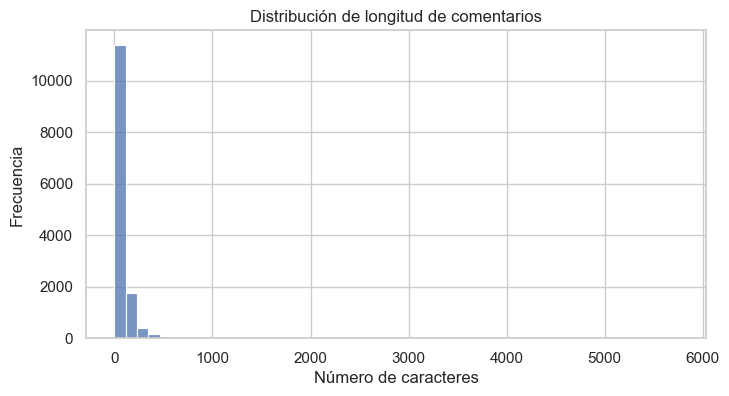

In [38]:
# Longitud de los comentarios

df["text_length"] = df["text_clean"].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50)
plt.title("Distribución de longitud de comentarios")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()


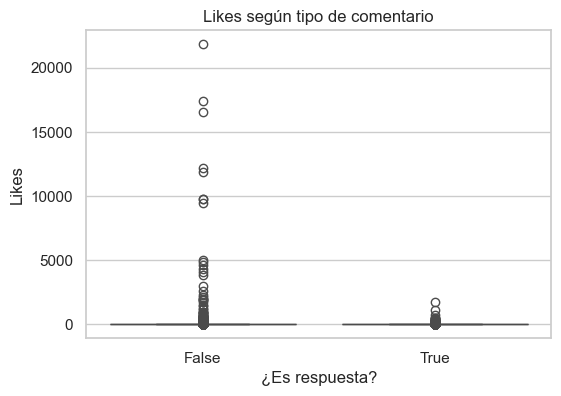

In [39]:
# Verificar cuántos comentarios con los principales y cúantos fueron respuestas a esos comentarios

plt.figure(figsize=(6,4))
sns.boxplot(x="is_reply", y="likes", data=df)
plt.title("Likes según tipo de comentario")
plt.xlabel("¿Es respuesta?")
plt.ylabel("Likes")
plt.show()


Guardado de la información en un dataset limpio

In [52]:
ruta_processed = "../../data/processed/youtube_comments_clean.csv"

df.to_csv(ruta_processed, index=False)
print("Archivo limpio guardado en data/processed")


Archivo limpio guardado en data/processed
